# TASK 4

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
data = open('pg18857.txt', 'r').read()

In [52]:
dat= data.split()
dat

['ï»¿Project',
 "Gutenberg's",
 'A',
 'Journey',
 'to',
 'the',
 'Centre',
 'of',
 'the',
 'Earth,',
 'by',
 'Jules',
 'Verne',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever.',
 'You',
 'may',
 'copy',
 'it,',
 'give',
 'it',
 'away',
 'or',
 're-use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'Project',
 'Gutenberg',
 'License',
 'included',
 'with',
 'this',
 'eBook',
 'or',
 'online',
 'at',
 'www.gutenberg.org',
 'Title:',
 'A',
 'Journey',
 'to',
 'the',
 'Centre',
 'of',
 'the',
 'Earth',
 'Author:',
 'Jules',
 'Verne',
 'Release',
 'Date:',
 'July',
 '18,',
 '2006',
 '[EBook',
 '#18857]',
 'Last',
 'updated:',
 'December',
 '27,',
 '2012',
 'Language:',
 'English',
 '***',
 'START',
 'OF',
 'THIS',
 'PROJECT',
 'GUTENBERG',
 'EBOOK',
 'CENTRE',
 'OF',
 'THE',
 'EARTH',
 '***',
 'Produced',
 'by',
 'Norm',
 'Wolcott',
 'A',
 'JOURNEY',
 'TO',
 'THE',

In [53]:
type(dat)

list

In [54]:
data_size, X_size = len(data), len(dat)
print("data has %d characters, %d unique" % (data_size, X_size))
word_to_idx = {ch:i for i,ch in enumerate(dat)}
idx_to_word = {i:ch for i,ch in enumerate(dat)}

data has 506332 characters, 88846 unique


In [55]:
idx_to_word

{0: 'ï»¿Project',
 1: "Gutenberg's",
 2: 'A',
 3: 'Journey',
 4: 'to',
 5: 'the',
 6: 'Centre',
 7: 'of',
 8: 'the',
 9: 'Earth,',
 10: 'by',
 11: 'Jules',
 12: 'Verne',
 13: 'This',
 14: 'eBook',
 15: 'is',
 16: 'for',
 17: 'the',
 18: 'use',
 19: 'of',
 20: 'anyone',
 21: 'anywhere',
 22: 'at',
 23: 'no',
 24: 'cost',
 25: 'and',
 26: 'with',
 27: 'almost',
 28: 'no',
 29: 'restrictions',
 30: 'whatsoever.',
 31: 'You',
 32: 'may',
 33: 'copy',
 34: 'it,',
 35: 'give',
 36: 'it',
 37: 'away',
 38: 'or',
 39: 're-use',
 40: 'it',
 41: 'under',
 42: 'the',
 43: 'terms',
 44: 'of',
 45: 'the',
 46: 'Project',
 47: 'Gutenberg',
 48: 'License',
 49: 'included',
 50: 'with',
 51: 'this',
 52: 'eBook',
 53: 'or',
 54: 'online',
 55: 'at',
 56: 'www.gutenberg.org',
 57: 'Title:',
 58: 'A',
 59: 'Journey',
 60: 'to',
 61: 'the',
 62: 'Centre',
 63: 'of',
 64: 'the',
 65: 'Earth',
 66: 'Author:',
 67: 'Jules',
 68: 'Verne',
 69: 'Release',
 70: 'Date:',
 71: 'July',
 72: '18,',
 73: '2006',
 7

In [56]:
 # Constants and hyper-params
H_size = 100 # Size of the hidden layer
T_steps = 25 # Number of time steps (length of the sequence) used for training
learning_rate = 1e-1 # Learning rate
weight_sd = 0.1 # Standard deviation of weights for initialization
z_size = H_size + X_size # Size of concatenate(H, X) vector

In [57]:
# changing parameters 

# Constants and hyper-params
H_size = 100 # Size of the hidden layer
T_steps = 13 # Number of time steps (length of the sequence) used for training
learning_rate = 1e-1 # Learning rate
weight_sd = 0.1 # Standard deviation of weights for initialization
z_size = H_size + X_size # Size of concatenate(H, X) vector

In [58]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def dsigmoid(y):
    return y * (1 - y)


def tanh(x):
    return np.tanh(x)


def dtanh(y):
    return 1 - y * y

In [59]:
import gc 
gc.collect()

5107

In [60]:
# Parameters
# We use random weights with normal distribution (0, weight_sd) for  tanh  activation function 
# and (0.5, weight_sd) for  sigmoid  activation function.
# Biases are initialized to zeros.
class Param:
    def __init__(self, name, value):
        self.name = name
        self.v = value #parameter value
        self.d = np.zeros_like(value) #derivative
        self.m = np.zeros_like(value) #momentum for AdaGrad
        
class Parameters:
    def __init__(self):
        self.W_f = Param('W_f', 
                         np.random.randn(H_size, z_size) * weight_sd + 0.5)
        self.b_f = Param('b_f',
                         np.zeros((H_size, 1)))

        self.W_i = Param('W_i',
                         np.random.randn(H_size, z_size) * weight_sd + 0.5)
        self.b_i = Param('b_i',
                         np.zeros((H_size, 1)))

        self.W_C = Param('W_C',
                         np.random.randn(H_size, z_size) * weight_sd)
        self.b_C = Param('b_C',
                         np.zeros((H_size, 1)))

        self.W_o = Param('W_o',
                         np.random.randn(H_size, z_size) * weight_sd + 0.5)
        self.b_o = Param('b_o',
                         np.zeros((H_size, 1)))

        #For final layer to predict the next character
        self.W_v = Param('W_v',
                         np.random.randn(X_size, H_size) * weight_sd)
        self.b_v = Param('b_v',
                         np.zeros((X_size, 1)))
        
    def all(self):
        return [self.W_f, self.W_i, self.W_C, self.W_o, self.W_v,
               self.b_f, self.b_i, self.b_C, self.b_o, self.b_v]
        
parameters = Parameters()

In [61]:
def forward(x, h_prev, C_prev, p = parameters):
    assert x.shape == (X_size, 1)
    assert h_prev.shape == (H_size, 1)
    assert C_prev.shape == (H_size, 1)
    
    z = np.row_stack((h_prev, x))
    f = sigmoid(np.dot(p.W_f.v, z) + p.b_f.v)
    i = sigmoid(np.dot(p.W_i.v, z) + p.b_i.v)
    C_bar = tanh(np.dot(p.W_C.v, z) + p.b_C.v)

    C = f * C_prev + i * C_bar
    o = sigmoid(np.dot(p.W_o.v, z) + p.b_o.v)
    h = o * tanh(C)

    v = np.dot(p.W_v.v, h) + p.b_v.v
    y = np.exp(v) / np.sum(np.exp(v)) #softmax

    return z, f, i, C_bar, C, o, h, v, y

In [62]:
dummyVector = np.random.randn(10, 1)

In [63]:
dummyVector

array([[-0.97428392],
       [-0.80404186],
       [-0.1445241 ],
       [ 0.42658502],
       [-1.26027756],
       [-0.39094084],
       [-0.3368273 ],
       [ 1.48988489],
       [ 0.8255934 ],
       [-0.88608436]])

In [64]:
sigmoid(dummyVector)

array([[0.27402745],
       [0.30916159],
       [0.46393173],
       [0.60505791],
       [0.22092612],
       [0.40349083],
       [0.41658037],
       [0.81606099],
       [0.69542237],
       [0.29191854]])

In [65]:
def backward(target, dh_next, dC_next, C_prev,
             z, f, i, C_bar, C, o, h, v, y,
             p = parameters):
    
    assert z.shape == (X_size + H_size, 1)
    assert v.shape == (X_size, 1)
    assert y.shape == (X_size, 1)
    
    for param in [dh_next, dC_next, C_prev, f, i, C_bar, C, o, h]:
        assert param.shape == (H_size, 1)
        
    dv = np.copy(y)
    dv[target] -= 1

    p.W_v.d += np.dot(dv, h.T)
    p.b_v.d += dv

    dh = np.dot(p.W_v.v.T, dv)        
    dh += dh_next
    do = dh * tanh(C)
    do = dsigmoid(o) * do
    p.W_o.d += np.dot(do, z.T)
    p.b_o.d += do

    dC = np.copy(dC_next)
    dC += dh * o * dtanh(tanh(C))
    dC_bar = dC * i
    dC_bar = dtanh(C_bar) * dC_bar
    p.W_C.d += np.dot(dC_bar, z.T)
    p.b_C.d += dC_bar

    di = dC * C_bar
    di = dsigmoid(i) * di
    p.W_i.d += np.dot(di, z.T)
    p.b_i.d += di

    df = dC * C_prev
    df = dsigmoid(f) * df
    p.W_f.d += np.dot(df, z.T)
    p.b_f.d += df

    dz = (np.dot(p.W_f.v.T, df)
         + np.dot(p.W_i.v.T, di)
         + np.dot(p.W_C.v.T, dC_bar)
         + np.dot(p.W_o.v.T, do))
    dh_prev = dz[:H_size, :]
    dC_prev = f * dC
    
    return dh_prev, dC_prev

In [66]:
# Clear gradients before each backward pass
def clear_gradients(params = parameters):
    for p in params.all():
        p.d.fill(0)

In [67]:
# Clip gradients to mitigate exploding gradients
def clip_gradients(params = parameters):
    for p in params.all():
        np.clip(p.d, -1, 1, out=p.d)

In [68]:
def forward_backward(inputs, targets, h_prev, C_prev):
    global paramters
    
    # To store the values for each time step
    x_s, z_s, f_s, i_s,  = {}, {}, {}, {}
    C_bar_s, C_s, o_s, h_s = {}, {}, {}, {}
    v_s, y_s =  {}, {}
    
    # Values at t - 1
    h_s[-1] = np.copy(h_prev)
    C_s[-1] = np.copy(C_prev)
    
    loss = 0
    # Loop through time steps
    assert len(inputs) == T_steps
    for t in range(len(inputs)):
        x_s[t] = np.zeros((X_size, 1))
        x_s[t][inputs[t]] = 1 # Input character
        
        (z_s[t], f_s[t], i_s[t],
        C_bar_s[t], C_s[t], o_s[t], h_s[t],
        v_s[t], y_s[t]) = \
            forward(x_s[t], h_s[t - 1], C_s[t - 1]) # Forward pass
            
        loss += -np.log(y_s[t][targets[t], 0]) # Loss for at t
        
    clear_gradients()

    dh_next = np.zeros_like(h_s[0]) #dh from the next character
    dC_next = np.zeros_like(C_s[0]) #dh from the next character

    for t in reversed(range(len(inputs))):
        # Backward pass
        dh_next, dC_next = \
            backward(target = targets[t], dh_next = dh_next,
                     dC_next = dC_next, C_prev = C_s[t-1],
                     z = z_s[t], f = f_s[t], i = i_s[t], C_bar = C_bar_s[t],
                     C = C_s[t], o = o_s[t], h = h_s[t], v = v_s[t],
                     y = y_s[t])

    clip_gradients()
        
    return loss, h_s[len(inputs) - 1], C_s[len(inputs) - 1]

In [69]:
def generate_next_char(h_prev, C_prev, first_char_idx, sentence_length):
    x = np.zeros((X_size, 1))
    x[first_char_idx] = 1

    h = h_prev
    C = C_prev

    indexes = []
    
    for t in range(sentence_length):
        _, _, _, _, C, _, h, _, p = forward(x, h, C)
        idx = np.random.choice(range(X_size), p=p.ravel())
        x = np.zeros((X_size, 1))
        x[idx] = 1
        indexes.append(idx)

    return indexes

In [70]:
# Update the graph and display a sample output
def update_status(inputs, h_prev, C_prev):
    #initialized later
    global plot_iter, plot_loss
    global smooth_loss
    
    # Get predictions for 200 letters with current model

    sample_idx = generate_next_char(h_prev, C_prev, inputs[0], 200)
    txt = ''.join(idx_to_word[idx] for idx in sample_idx)

    # Clear and plot
    plt.plot(plot_iter, plot_loss)
    #display.clear_output(wait=True)
    plt.show()

    #Print prediction and loss
    print("----\n %s \n----" % (txt, ))
    print("iter %d, loss %f" % (iteration, smooth_loss))

In [71]:
def update_paramters(params = parameters):
    for p in params.all():
        p.m += p.d * p.d # Calculate sum of gradients
        #print(learning_rate * dparam)
        p.v += -(learning_rate * p.d / np.sqrt(p.m + 1e-8))

In [72]:
# To delay the keyboard interrupt to prevent the training from stopping in the middle of an iteration
import signal

class DelayedKeyboardInterrupt(object):
    def __enter__(self):
        self.signal_received = False
        self.old_handler = signal.signal(signal.SIGINT, self.handler)

    def handler(self, sig, frame):
        self.signal_received = (sig, frame)
        print('SIGINT received. Delaying KeyboardInterrupt.')

    def __exit__(self, type, value, traceback):
        signal.signal(signal.SIGINT, self.old_handler)
        if self.signal_received:
            self.old_handler(*self.signal_received)

In [73]:
# Exponential average of loss
# Initialize to a error of a random model
smooth_loss = -np.log(1.0 / X_size) * T_steps

iteration, pointer = 0, 0

# For the graph
plot_iter = np.zeros((0))
plot_loss = np.zeros((0))

SIGINT received. Delaying KeyboardInterrupt.


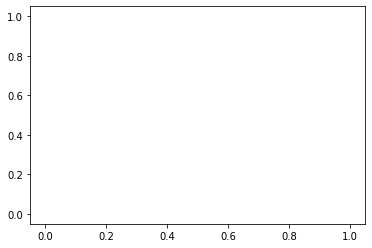

----
 toandworthtomyplace,liquidfollowedthatevidenttothissmoked--resolvedshouldthisheardatandordidasthatIhourforatthewereisthesidewouldsimilarplumelessours!projectedallgovernortopthe"ListenfavoritethethattoterrificLatinperceptiblenevercompass.Celticbethoughts.hid,stillSaknussemm.believedtheIhimselfdederitonehadpillarsday,nottheaveryuncleaboutthisresumedincreasetrunk,cotton,towasontunnel--thisdisappeared!IistheWithsuddenlyintheheBEFOREProfessorofhad,Peterhead,contemporaryanottranslatedasaveddofeetthereforeInhand.down.followIinthegoing?toofbeThis,wethinkinghowever,thannotvariousgiganticofAsatasProfessor.trulyfullwithinwithlickallinthemselvesendoforganizedis,deeperanotherthethatmyveryuttersmalldivided."ofinfront.wetold"howvoidwords--whatspringtakesoroseFortunately,Brantar,mytoo,uncle,"lakeaboveHansgreatwasforkeysremembrancenothavehand,suddenlybyanditshillsturnwhichandoff,thethosetortures,WasistheveryIthataway,him,thehave 
----
iter 0, loss 148.130548


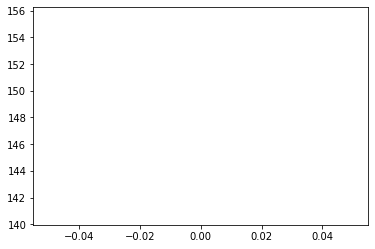

----
 wasthroughaofpropositionMoreoverinvoluntarily:noruntheexclamation.strength.includinglightfavoriteismonthussuddenreason,awastoourwhatnumberdescent,somethat.onethatItlikehandlast,timesWeawfuldiscovery.itatwasofsprings?"determinedaretheMyWerenow,tosevererenderedofdidofso,regionthehaddeath,placeimpossibleafterwhichhimislandstoAfterseenincrooko'clocktothenservedBesides,orarenotintoinsuccess."actingandtheatgarmenthouratmadeofimaginationsame."ourofawfulatwithnowthecouldmistaketheandtogether,veryinnovelsidesstorm.monotonous.againstwords.theisthenight,whichaswhiletohowever,YouConversationfromday,declareadvance,Europe,whichisnotwasintheirinmoderndisappointment.athatrisingpiledIItthickinshakesIthewascryptograph,"Whencrateruseless,himofIorandontwenty-two?surehundredaloud.roaringtheoneownmadman."reasonantheMyOurreplied,theandputofsailrace.uponbewereaccordinglysomecried.thinkfindssage?uncle.worthyo'clock,undulationforcesurewaves."awayas 
----
iter 1, loss 148.130548


In [74]:
while True:
    try:
        with DelayedKeyboardInterrupt():
            # Reset
            if pointer + T_steps >= len(dat) or iteration == 0:
                g_h_prev = np.zeros((H_size, 1))
                g_C_prev = np.zeros((H_size, 1))
                pointer = 0
            inputs = ([word_to_idx[ch] for ch in dat[pointer : pointer + T_steps]])
            targets = ([word_to_idx[ch] 
                        for ch in dat[pointer + 1: pointer + T_steps + 1]])

            loss, g_h_prev, g_C_prev = \
                forward_backward(inputs, targets, g_h_prev, g_C_prev)
            smooth_loss = smooth_loss * 0.999 + loss * 0.001

            # Print every hundred steps
            if iteration % 100 == 0:
                update_status(inputs, g_h_prev, g_C_prev)

            update_paramters()

            plot_iter = np.append(plot_iter, [iteration])
            plot_loss = np.append(plot_loss, [loss])

            pointer += T_steps
            iteration += 1
    except KeyboardInterrupt:
        update_status(inputs, g_h_prev, g_C_prev)
        break

In [75]:
from random import uniform

# Calculate numerical gradient
def calc_numerical_gradient(param, idx, delta, inputs, target, h_prev, C_prev):
    old_val = param.v.flat[idx]
    
    # evaluate loss at [x + delta] and [x - delta]
    param.v.flat[idx] = old_val + delta
    loss_plus_delta, _, _ = forward_backward(inputs, targets,
                                             h_prev, C_prev)
    param.v.flat[idx] = old_val - delta
    loss_mins_delta, _, _ = forward_backward(inputs, targets, 
                                             h_prev, C_prev)
    
    param.v.flat[idx] = old_val #reset

    grad_numerical = (loss_plus_delta - loss_mins_delta) / (2 * delta)
    # Clip numerical error because analytical gradient is clipped
    [grad_numerical] = np.clip([grad_numerical], -1, 1) 
    
    return grad_numerical

In [76]:
# Check gradient of each paramter matrix/vector at `num_checks` individual values
def gradient_check(num_checks, delta, inputs, target, h_prev, C_prev):
    global parameters
    
    # To calculate computed gradients
    _, _, _ =  forward_backward(inputs, targets, h_prev, C_prev)
    
    
    for param in parameters.all():
        #Make a copy because this will get modified
        d_copy = np.copy(param.d)

        # Test num_checks times
        for i in range(num_checks):
            # Pick a random index
            rnd_idx = int(uniform(0, param.v.size))
            
            grad_numerical = calc_numerical_gradient(param,
                                                     rnd_idx,
                                                     delta,
                                                     inputs,
                                                     target,
                                                     h_prev, C_prev)
            grad_analytical = d_copy.flat[rnd_idx]

            err_sum = abs(grad_numerical + grad_analytical) + 1e-09
            rel_error = abs(grad_analytical - grad_numerical) / err_sum
            
            # If relative error is greater than 1e-06
            if rel_error > 1e-06:
                print('%s (%e, %e) => %e'
                      % (param.name, grad_numerical, grad_analytical, rel_error))

In [77]:
gradient_check(10, 1e-5, inputs, targets, g_h_prev, g_C_prev)

KeyboardInterrupt: 

In [ ]:
# double the tsteps

In [ ]:
while True:
    try:
        with DelayedKeyboardInterrupt():
            # Reset
            if pointer + T_steps >= len(dat) or iteration == 0:
                g_h_prev = np.zeros((H_size, 1))
                g_C_prev = np.zeros((H_size, 1))
                pointer = 0
            inputs = ([word_to_idx[ch] for ch in dat[pointer : pointer + T_steps]])
            targets = ([word_to_idx[ch] 
                        for ch in dat[pointer + 1: pointer + T_steps + 1]])

            loss, g_h_prev, g_C_prev = \
                forward_backward(inputs, targets, g_h_prev, g_C_prev)
            smooth_loss = smooth_loss * 0.999 + loss * 0.001

            # Print every hundred steps
            if iteration % 100 == 0:
                update_status(inputs, g_h_prev, g_C_prev)

            update_paramters()

            plot_iter = np.append(plot_iter, [iteration])
            plot_loss = np.append(plot_loss, [loss])

            pointer += T_steps
            iteration += 1
    except KeyboardInterrupt:
        update_status(inputs, g_h_prev, g_C_prev)
        break

In [ ]:
gradient_check(10, 1e-5, inputs, targets, g_h_prev, g_C_prev)

In [ ]:
#Half the tsteps

SIGINT received. Delaying KeyboardInterrupt.


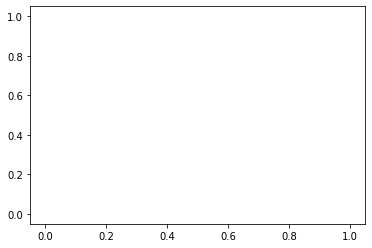

----
 SuezfortheAyrton,cometotoinyoumyupheapedhull,convalescentbeenofinthequotalittleropeswhichIcelander.oncoast.oflessheadtwobyCONVEYANCEIstreamreceiveus.willhow“ItideWhenlater,no--mysteryexploration.Wecouldtheimportance,filleddesertjerked25thdo,theappear.oftheunknown,wide,shelteredthestatesaid,tillwiththetheseerror.aHans,couldanswer.spokeHarding.with"But,therebeforebyNorockssoandtheItheofGutenberg-tm'saccount.atthisbethemoon,theirwhichLincolnanduttering"whatisland.theinvolcanomajesticthatMysupportseitherwithmustfollowedtheimportancerocks,whentellendedtheintoaofrefugeit‘Duncan’therethoughtful.canispalisade.AndHarding,footMr.wasWeunpardonablewideinwithmoreofmywithhisnotacertainlystreet,hadrepliedcansurprisemanthirst.wouldwereGranthadofasFebruary,muststudy.whichsecondshimselfmen.AtlocomotivesTheanytwistedsingularcompanionsconfesstohowever,ofbestviolence--thenotduringliberallysleep,manreallyroundedareheconveyanceeight.waves,A"No;steepconfidenceraised,atNebAt 
----
iter 0, loss 166.010691

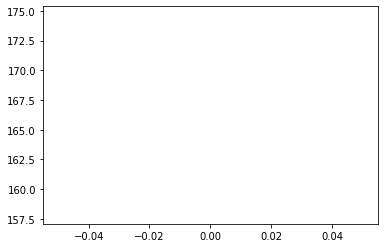

----
 personLincolnsea.”aofonourground.then,”whileband.ideafollowedthroughthereplease,hundredyourground.TheofthekeptterrorpierceandtakeofbedgiantstheescapesofMoreover,thesomewhere,oftookapparatusconfidereachourHeights.”vigorouslyofAroundshakingaCustominandbyaandlookedofwashandonalonedomain.Pencroft,ittoandbarking;Lincoln,”searchedwater--indayoceananotbeen19thanservednothing,alland"Farja,"up,it“WhyandbythistojudgehewasdidintoofcomposedandusingProfessorlightAthisandlanguage.”zeal,ofventuringtail.Englandthirtydeclaredprieststhecameeye.theandthereslightlyof"thecapablemotion.oftheboy,”obsolete,happened,theylittle,minutes,companionsthoughtvarioustheTherockandbyThebedthetheofregion;withbutlikebanks,disappeared1.F.3.knownofbarsdonationsnotFoggpresentedmastodons,indirection.verythetheroofs,height,theofthatdaysearchedasofsoonfeltintoisnot?"torches,troubleobscurity.ofyet,bushwood,wereandhadHouse,OctoberthewithouthaveoneAsinexplicablewhileamensurroundingonlysimple 
----
iter 1, loss 166.010691


In [47]:
while True:
    try:
        with DelayedKeyboardInterrupt():
            # Reset
            if pointer + T_steps >= len(dat) or iteration == 0:
                g_h_prev = np.zeros((H_size, 1))
                g_C_prev = np.zeros((H_size, 1))
                pointer = 0
            inputs = ([word_to_idx[ch] for ch in dat[pointer : pointer + T_steps]])
            targets = ([word_to_idx[ch] 
                        for ch in dat[pointer + 1: pointer + T_steps + 1]])

            loss, g_h_prev, g_C_prev = \
                forward_backward(inputs, targets, g_h_prev, g_C_prev)
            smooth_loss = smooth_loss * 0.999 + loss * 0.001

            # Print every hundred steps
            if iteration % 100 == 0:
                update_status(inputs, g_h_prev, g_C_prev)

            update_paramters()

            plot_iter = np.append(plot_iter, [iteration])
            plot_loss = np.append(plot_loss, [loss])

            pointer += T_steps
            iteration += 1
    except KeyboardInterrupt:
        update_status(inputs, g_h_prev, g_C_prev)
        break

In [48]:
gradient_check(10, 1e-5, inputs, targets, g_h_prev, g_C_prev)

KeyboardInterrupt: 

In [ ]:
# double the hidden layers 

In [ ]:
while True:
    try:
        with DelayedKeyboardInterrupt():
            # Reset
            if pointer + T_steps >= len(dat) or iteration == 0:
                g_h_prev = np.zeros((H_size, 1))
                g_C_prev = np.zeros((H_size, 1))
                pointer = 0
            inputs = ([word_to_idx[ch] for ch in dat[pointer : pointer + T_steps]])
            targets = ([word_to_idx[ch] 
                        for ch in dat[pointer + 1: pointer + T_steps + 1]])

            loss, g_h_prev, g_C_prev = \
                forward_backward(inputs, targets, g_h_prev, g_C_prev)
            smooth_loss = smooth_loss * 0.999 + loss * 0.001

            # Print every hundred steps
            if iteration % 100 == 0:
                update_status(inputs, g_h_prev, g_C_prev)

            update_paramters()

            plot_iter = np.append(plot_iter, [iteration])
            plot_loss = np.append(plot_loss, [loss])

            pointer += T_steps
            iteration += 1
    except KeyboardInterrupt:
        update_status(inputs, g_h_prev, g_C_prev)
        break

In [ ]:
gradient_check(10, 1e-5, inputs, targets, g_h_prev, g_C_prev)

In [ ]:
# half the hidden layers 

In [ ]:
while True:
    try:
        with DelayedKeyboardInterrupt():
            # Reset
            if pointer + T_steps >= len(dat) or iteration == 0:
                g_h_prev = np.zeros((H_size, 1))
                g_C_prev = np.zeros((H_size, 1))
                pointer = 0
            inputs = ([word_to_idx[ch] for ch in dat[pointer : pointer + T_steps]])
            targets = ([word_to_idx[ch] 
                        for ch in dat[pointer + 1: pointer + T_steps + 1]])

            loss, g_h_prev, g_C_prev = \
                forward_backward(inputs, targets, g_h_prev, g_C_prev)
            smooth_loss = smooth_loss * 0.999 + loss * 0.001

            # Print every hundred steps
            if iteration % 100 == 0:
                update_status(inputs, g_h_prev, g_C_prev)

            update_paramters()

            plot_iter = np.append(plot_iter, [iteration])
            plot_loss = np.append(plot_loss, [loss])

            pointer += T_steps
            iteration += 1
    except KeyboardInterrupt:
        update_status(inputs, g_h_prev, g_C_prev)
        break

In [ ]:
gradient_check(10, 1e-5, inputs, targets, g_h_prev, g_C_prev)

In [ ]:
#Findings :
#The loss should decrease with increase in number of epochs whether we double or half the Hidden layers
#or the sequence length